In [1]:
import os
os.chdir('D:\Birkbeck\MSc Data Science\Year 2\DSTA\CW\Parkinsons Speech')

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split , KFold , cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('parkinsons.csv', header = 1, index_col = 0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 251
Columns: 754 entries, gender to class
dtypes: float64(749), int64(5)
memory usage: 4.4 MB


In [5]:
df.head()

gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
id                                                                   
0        1  0.85247  0.71826  0.57227        240               239   
0        1  0.76686  0.69481  0.53966        234               233   
0        1  0.85083  0.67604  0.58982        232               231   
1        0  0.41121  0.79672  0.59257        178               177   
1        0  0.32790  0.79782  0.53028        236               235   

    meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  \
id                                                                     
0           0.008064            0.000087       0.00218      0.000018   
0           0.008258            0.000073       0.00195      0.000016   
0           0.008340            0.000060       0.00176      0.000015   
1           0.010858            0.000183       0.00419      0.000046   
1           0.008162            0.002669       0.00535      0.000044   

    rapJitter  ppq5Jitter  ddpJitter  locShimmer  locDbShimmer  apq3Shimmer  \
id                                                                            
0     0.00067     0.00129    0.00200     0.05883         0.517      0.03011   
0     0.00052     0.00112    0.00157     0.05516         0.502      0.02320   
0     0.00057     0.00111    0.00171     0.09902         0.897      0.05094   
1     0.00149     0.00268    0.00446     0.05451         0.527      0.02395   
1     0.00166     0.00227    0.00499     0.05610         0.497      0.02909   

    apq5Shimmer  apq11Shimmer  ddaShimmer  meanAutoCorrHarmonicity  \
id                                                                   
0       0.03496       0.04828     0.09034                 0.970805   
0       0.03675       0.06195     0.06961                 0.984322   
0       0.06497       0.07772     0.15282                 0.974846   
1       0.02857       0.04462     0.07185                 0.968343   
1       0.03327       0.05278     0.08728                 0.975754   

    meanNoiseToHarmHarmonicity  meanHarmToNoiseHarmonicity  minIntensity  \
id                                                                         
0                     0.036223                      18.995     69.997496   
0                     0.017974                      21.497     67.415903   
0                     0.026313                      17.651     62.661706   
1                     0.042003                      19.865     76.306989   
1                     0.027139                      19.557     76.645686   

    maxIntensity  meanIntensity          f1           f2           f3  \
id                                                                      
0      76.088046      72.465512  539.342735  1031.849040  2447.162183   
0      73.046374      71.528945  564.363615  1016.367294  2383.565201   
0      71.633549      68.086583  548.444604  1032.406341  2357.826954   
1      81.000749      79.190593  819.529588  1201.813897  3154.035654   
1      80.937258      79.183495  846.796144  1215.346469  3201.513132   

             f4          b1          b2          b3          b4  GQ_prc5_95  \
id                                                                            
0   3655.054806  101.092218   83.147440  255.214830  396.643631     0.77778   
0   3498.681572   58.465428   86.487292  248.357127  218.229722     0.81250   
0   3678.128717  160.387771   54.685168  151.694847   84.240339     0.81818   
1   4122.163933  238.667052  191.984916  573.752909  526.147599     0.98548   
1   4085.456839  402.216738  210.061394  203.637106  384.611697     0.97847   

    GQ_std_cycle_open  GQ_std_cycle_closed  GNE_mean  GNE_std  GNE_SNR_TKEO  \
id                                                                            
0             11.7245               2.8277   1.17300  0.26512      0.083127   
0             13.8284               2.8908   1.02210  0.22004      0.127410   
0             26.9273               2.6975   0.8

In [6]:
df.groupby('class').size()

class
0    192
1    564
dtype: int64

### Understanding Data Balance - Gender and Class

In [7]:
# Using pandas cross tab
cm = pd.crosstab(df['class'],df['gender'], 
                 rownames = ['Class: 0 = No PD, 1 = PD'], 
                 colnames = ['Gender: 0 = Female, 1 = Male'],
                 margins = True)
cm

Gender: 0 = Female, 1 = Male    0    1  All
Class: 0 = No PD, 1 = PD                   
0                             123   69  192
1                             243  321  564
All                           366  390  756

In [8]:
men_with = 321/390*100
print('%s: %.2f%%' %("Percent of men with PD: ", round(men_with,2)))
print('%s: %.2f%%' %("Percent of men without PD: ", round(100-men_with,2)))

Percent of men with PD: : 82.31%
Percent of men without PD: : 17.69%


In [9]:
women_with = 243/366*100
print('%s: %.2f%%' % ("Percent of Women with PD: ", round(women_with,2)))
print('%s: %.2f%%' % ("Percent of Women without PD: ", round(100-women_with,2)))

Percent of Women with PD: : 66.39%
Percent of Women without PD: : 33.61%


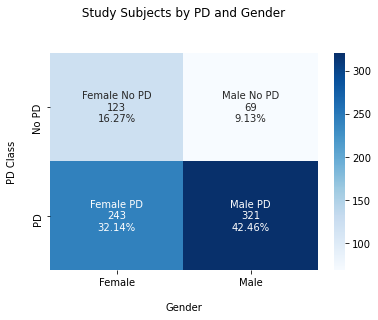

In [10]:
# using confusion matrix & heatmap to view gender & pd data
cls_gen = confusion_matrix(df['class'],df['gender']) 

#Create Label Info
group_names = ['Female No PD', 'Male No PD', 'Female PD', 'Male PD']
group_counts = ["{0:0.0f}".format(value) for value in cls_gen.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cls_gen.flatten()/np.sum(cls_gen)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

#Create Heatmap
ax = sns.heatmap(cls_gen, annot=labels, fmt='', cmap='Blues')
ax.set_title(' Study Subjects by PD and Gender \n\n');
ax.set_xlabel('Gender')
ax.set_ylabel('PD Class\n');
ax.xaxis.set_ticklabels(['Female','Male\n'])
ax.yaxis.set_ticklabels(['No PD','PD'])
plt.show()

In [11]:
X = pd.DataFrame(df.iloc[:, 0:753])
y = pd.DataFrame(df.iloc[:,-1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(604, 753)
(152, 753)
(604, 1)
(152, 1)


In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 249 to 221
Columns: 753 entries, gender to tqwt_kurtosisValue_dec_36
dtypes: float64(749), int64(4)
memory usage: 3.5 MB


In [13]:
#scale the data (PCA will centre)
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X = scaler.fit_transform(X_train)
X_df = pd.DataFrame(scaled_X, columns = X_train.columns)

X_df.describe()

gender         PPE         DFA        RPDE   numPulses  \
count  604.000000  604.000000  604.000000  604.000000  604.000000   
mean     0.508278    0.809113    0.509960    0.442390    0.529987   
std      0.500346    0.202532    0.227484    0.197609    0.156516   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.829865    0.337447    0.286588    0.416392   
50%      1.000000    0.881935    0.511439    0.431603    0.520593   
75%      1.000000    0.911199    0.687965    0.576729    0.634267   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  \
count        604.000000        604.000000          604.000000    604.000000   
mean           0.529559          0.349559            0.099029      0.074221   
std            0.156824          0.178421            0.202483      0.092758   
min            0.000000          0.000000            0.000000      0.000000   
25%            0.416392          0.213477            0.009932      0.027233   
50%            0.520593          0.317422            0.017976      0.046115   
75%            0.634267          0.453720            0.039195      0.082062   
max            1.000000          1.000000            1.000000      1.000000   

       locAbsJitter   rapJitter  ppq5Jitter   ddpJitter  locShimmer  \
count    604.000000  604.000000  604.000000  604.000000  604.000000   
mean       0.060847    0.051037    0.058244    0.051323    0.243144   
std        0.089108    0.088856    0.089195    0.088822    0.176475   
min        0.000000    0.000000    0.000000    0.000000    0.000000   
25%        0.017569    0.010879    0.016968    0.011480    0.116026   
50%        0.034242    0.023572    0.032293    0.023565    0.194436   
75%        0.068176    0.056210    0.064039    0.056798    0.317243   
max        1.000000    1.000000    1.000000    1.000000    1.000000   

       locDbShimmer  apq3Shimmer  apq5Shimmer  apq11Shimmer  ddaShimmer  \
count    604.000000   604.000000   604.000000    604.000000  604.000000   
mean       0.260982     0.238079     0.184919      0.181744    0.238092   
std        0.186435     0.178499     0.140386      0.127030    0.178489   
min        0.000000     0.000000     0.000000      0.000000    0.000000   
25%        0.123845     0.107719     0.085291      0.092836    0.107713   
50%        0.210987     0.185986     0.143095      0.150176    0.186003   
75%        0.351118     0.318142     0.238342      0.239689    0.318152   
max        1.000000     1.000000     1.000000      1.000000    1.000000   

       meanAutoCorrHarmonicity  meanNoiseToHarmHarmonicity  \
count               604.000000                  604.000000   
mean                  0.911571                    0.062789   
std                   0.152378                    0.131796   
min                   0.000000                    0.000000   
25%                   0.918499                    0.008170   
50%                   0.965709                    0.019114   
75%                   0.984966                    0.047937   
max                   1.000000                    1.000000   

       meanHarmToNoiseHarmonicity  minIntensity  maxIntensity  meanIntensity  \
count                  604.000000    604.000000    604.000000     604.000000   
mean                     0.552792      0.768827      0.765200       0.761025   
std                      0.177806      0.154505      0.145422       0.146936   
min                      0.000000      0.000000      0.000000       0.000000   
25%                      0.454553      0.703483      0.700598       0.693520   
50%                      0.574615      0.827124      0.818516       0.820105   
75%                      0.675401      0.873317      0.860726       0.859161   
max                      1.000000      1.000000      1.000000       1.000000   

               f1          f2          f3          f4          b1          b2  \


In [14]:
#apply the scaler to the test set also - only transform, not fit. For use later...
scaled_X_test = scaler.transform(X_test)
X_test_df = pd.DataFrame(scaled_X_test, columns = X_test.columns)

Too many features/columns to check all so narrow down first. 

Check if any columns have standard deviation of 0, or very low std dev, so not much variance in the data. 

Can also check for correlation between variables - if data between columns highly correlated, suggests redundancy. 

From study - features are in groups, review/collate by group.

In [15]:
#creating scaled X df including the target/class stored in y_train
train_df =X_df.copy()
train_df['class'] = y_train.values
#train_df.head()
train_df.describe()

gender         PPE         DFA        RPDE   numPulses  \
count  604.000000  604.000000  604.000000  604.000000  604.000000   
mean     0.508278    0.809113    0.509960    0.442390    0.529987   
std      0.500346    0.202532    0.227484    0.197609    0.156516   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.829865    0.337447    0.286588    0.416392   
50%      1.000000    0.881935    0.511439    0.431603    0.520593   
75%      1.000000    0.911199    0.687965    0.576729    0.634267   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  \
count        604.000000        604.000000          604.000000    604.000000   
mean           0.529559          0.349559            0.099029      0.074221   
std            0.156824          0.178421            0.202483      0.092758   
min            0.000000          0.000000            0.000000      0.000000   
25%            0.416392          0.213477            0.009932      0.027233   
50%            0.520593          0.317422            0.017976      0.046115   
75%            0.634267          0.453720            0.039195      0.082062   
max            1.000000          1.000000            1.000000      1.000000   

       locAbsJitter   rapJitter  ppq5Jitter   ddpJitter  locShimmer  \
count    604.000000  604.000000  604.000000  604.000000  604.000000   
mean       0.060847    0.051037    0.058244    0.051323    0.243144   
std        0.089108    0.088856    0.089195    0.088822    0.176475   
min        0.000000    0.000000    0.000000    0.000000    0.000000   
25%        0.017569    0.010879    0.016968    0.011480    0.116026   
50%        0.034242    0.023572    0.032293    0.023565    0.194436   
75%        0.068176    0.056210    0.064039    0.056798    0.317243   
max        1.000000    1.000000    1.000000    1.000000    1.000000   

       locDbShimmer  apq3Shimmer  apq5Shimmer  apq11Shimmer  ddaShimmer  \
count    604.000000   604.000000   604.000000    604.000000  604.000000   
mean       0.260982     0.238079     0.184919      0.181744    0.238092   
std        0.186435     0.178499     0.140386      0.127030    0.178489   
min        0.000000     0.000000     0.000000      0.000000    0.000000   
25%        0.123845     0.107719     0.085291      0.092836    0.107713   
50%        0.210987     0.185986     0.143095      0.150176    0.186003   
75%        0.351118     0.318142     0.238342      0.239689    0.318152   
max        1.000000     1.000000     1.000000      1.000000    1.000000   

       meanAutoCorrHarmonicity  meanNoiseToHarmHarmonicity  \
count               604.000000                  604.000000   
mean                  0.911571                    0.062789   
std                   0.152378                    0.131796   
min                   0.000000                    0.000000   
25%                   0.918499                    0.008170   
50%                   0.965709                    0.019114   
75%                   0.984966                    0.047937   
max                   1.000000                    1.000000   

       meanHarmToNoiseHarmonicity  minIntensity  maxIntensity  meanIntensity  \
count                  604.000000    604.000000    604.000000     604.000000   
mean                     0.552792      0.768827      0.765200       0.761025   
std                      0.177806      0.154505      0.145422       0.146936   
min                      0.000000      0.000000      0.000000       0.000000   
25%                      0.454553      0.703483      0.700598       0.693520   
50%                      0.574615      0.827124      0.818516       0.820105   
75%                      0.675401      0.873317      0.860726       0.859161   
max                      1.000000      1.000000      1.000000       1.000000   

               f1          f2          f3          f4          b1          b2  \


In [16]:
train_df.groupby('class').size()

class
0    153
1    451
dtype: int64

## Selection of 3 Features

In [17]:
# list of best features from part 1 - selected using SelectKBest ANOVA and Mutual Information, then highly correlated removed

best_feat = ['app_LT_entropy_shannon_10_coef',
       'app_LT_entropy_log_9_coef',
       'tqwt_TKEO_mean_dec_12',
       'tqwt_TKEO_std_dec_12','mean_MFCC_2nd_coef', 'std_7th_delta_delta', 'std_9th_delta_delta',
       'tqwt_entropy_log_dec_12',
       'tqwt_stdValue_dec_12',  'tqwt_minValue_dec_13','tqwt_maxValue_dec_12','class']

best_train = pd.DataFrame(train_df, columns = best_feat)
best_train.describe()


app_LT_entropy_shannon_10_coef  app_LT_entropy_log_9_coef  \
count                      604.000000                 604.000000   
mean                         0.510661                   0.577576   
std                          0.157971                   0.153618   
min                          0.000000                   0.000000   
25%                          0.400022                   0.476700   
50%                          0.506773                   0.590287   
75%                          0.621292                   0.687840   
max                          1.000000                   1.000000   

       tqwt_TKEO_mean_dec_12  tqwt_TKEO_std_dec_12  mean_MFCC_2nd_coef  \
count             604.000000            604.000000          604.000000   
mean                0.020233              0.037437            0.532699   
std                 0.062890              0.083560            0.184659   
min                 0.000000              0.000000            0.000000   
25%                 0.000523              0.002115            0.416976   
50%                 0.002342              0.008327            0.543520   
75%                 0.011762              0.029351            0.678359   
max                 1.000000              1.000000            1.000000   

       std_7th_delta_delta  std_9th_delta_delta  tqwt_entropy_log_dec_12  \
count           604.000000           604.000000               604.000000   
mean              0.280724             0.362894                 0.552994   
std               0.136595             0.177418                 0.163675   
min               0.000000             0.000000                 0.000000   
25%               0.183789             0.235820                 0.447321   
50%               0.250351             0.320354                 0.553951   
75%               0.346484             0.465191                 0.672151   
max               1.000000             1.000000                 1.000000   

       tqwt_stdValue_dec_12  tqwt_minValue_dec_13  tqwt_maxValue_dec_12  \
count            604.000000            604.000000            604.000000   
mean               0.091530              0.826959              0.173031   
std                0.107093              0.138966              0.144725   
min                0.000000              0.000000              0.000000   
25%                0.023022              0.761624              0.069437   
50%                0.051258              0.861918              0.136049   
75%                0.118720              0.931827              0.229412   
max                1.000000              1.000000              1.000000   

            class  
count  604.000000  
mean     0.746689  
std      0.435268  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000

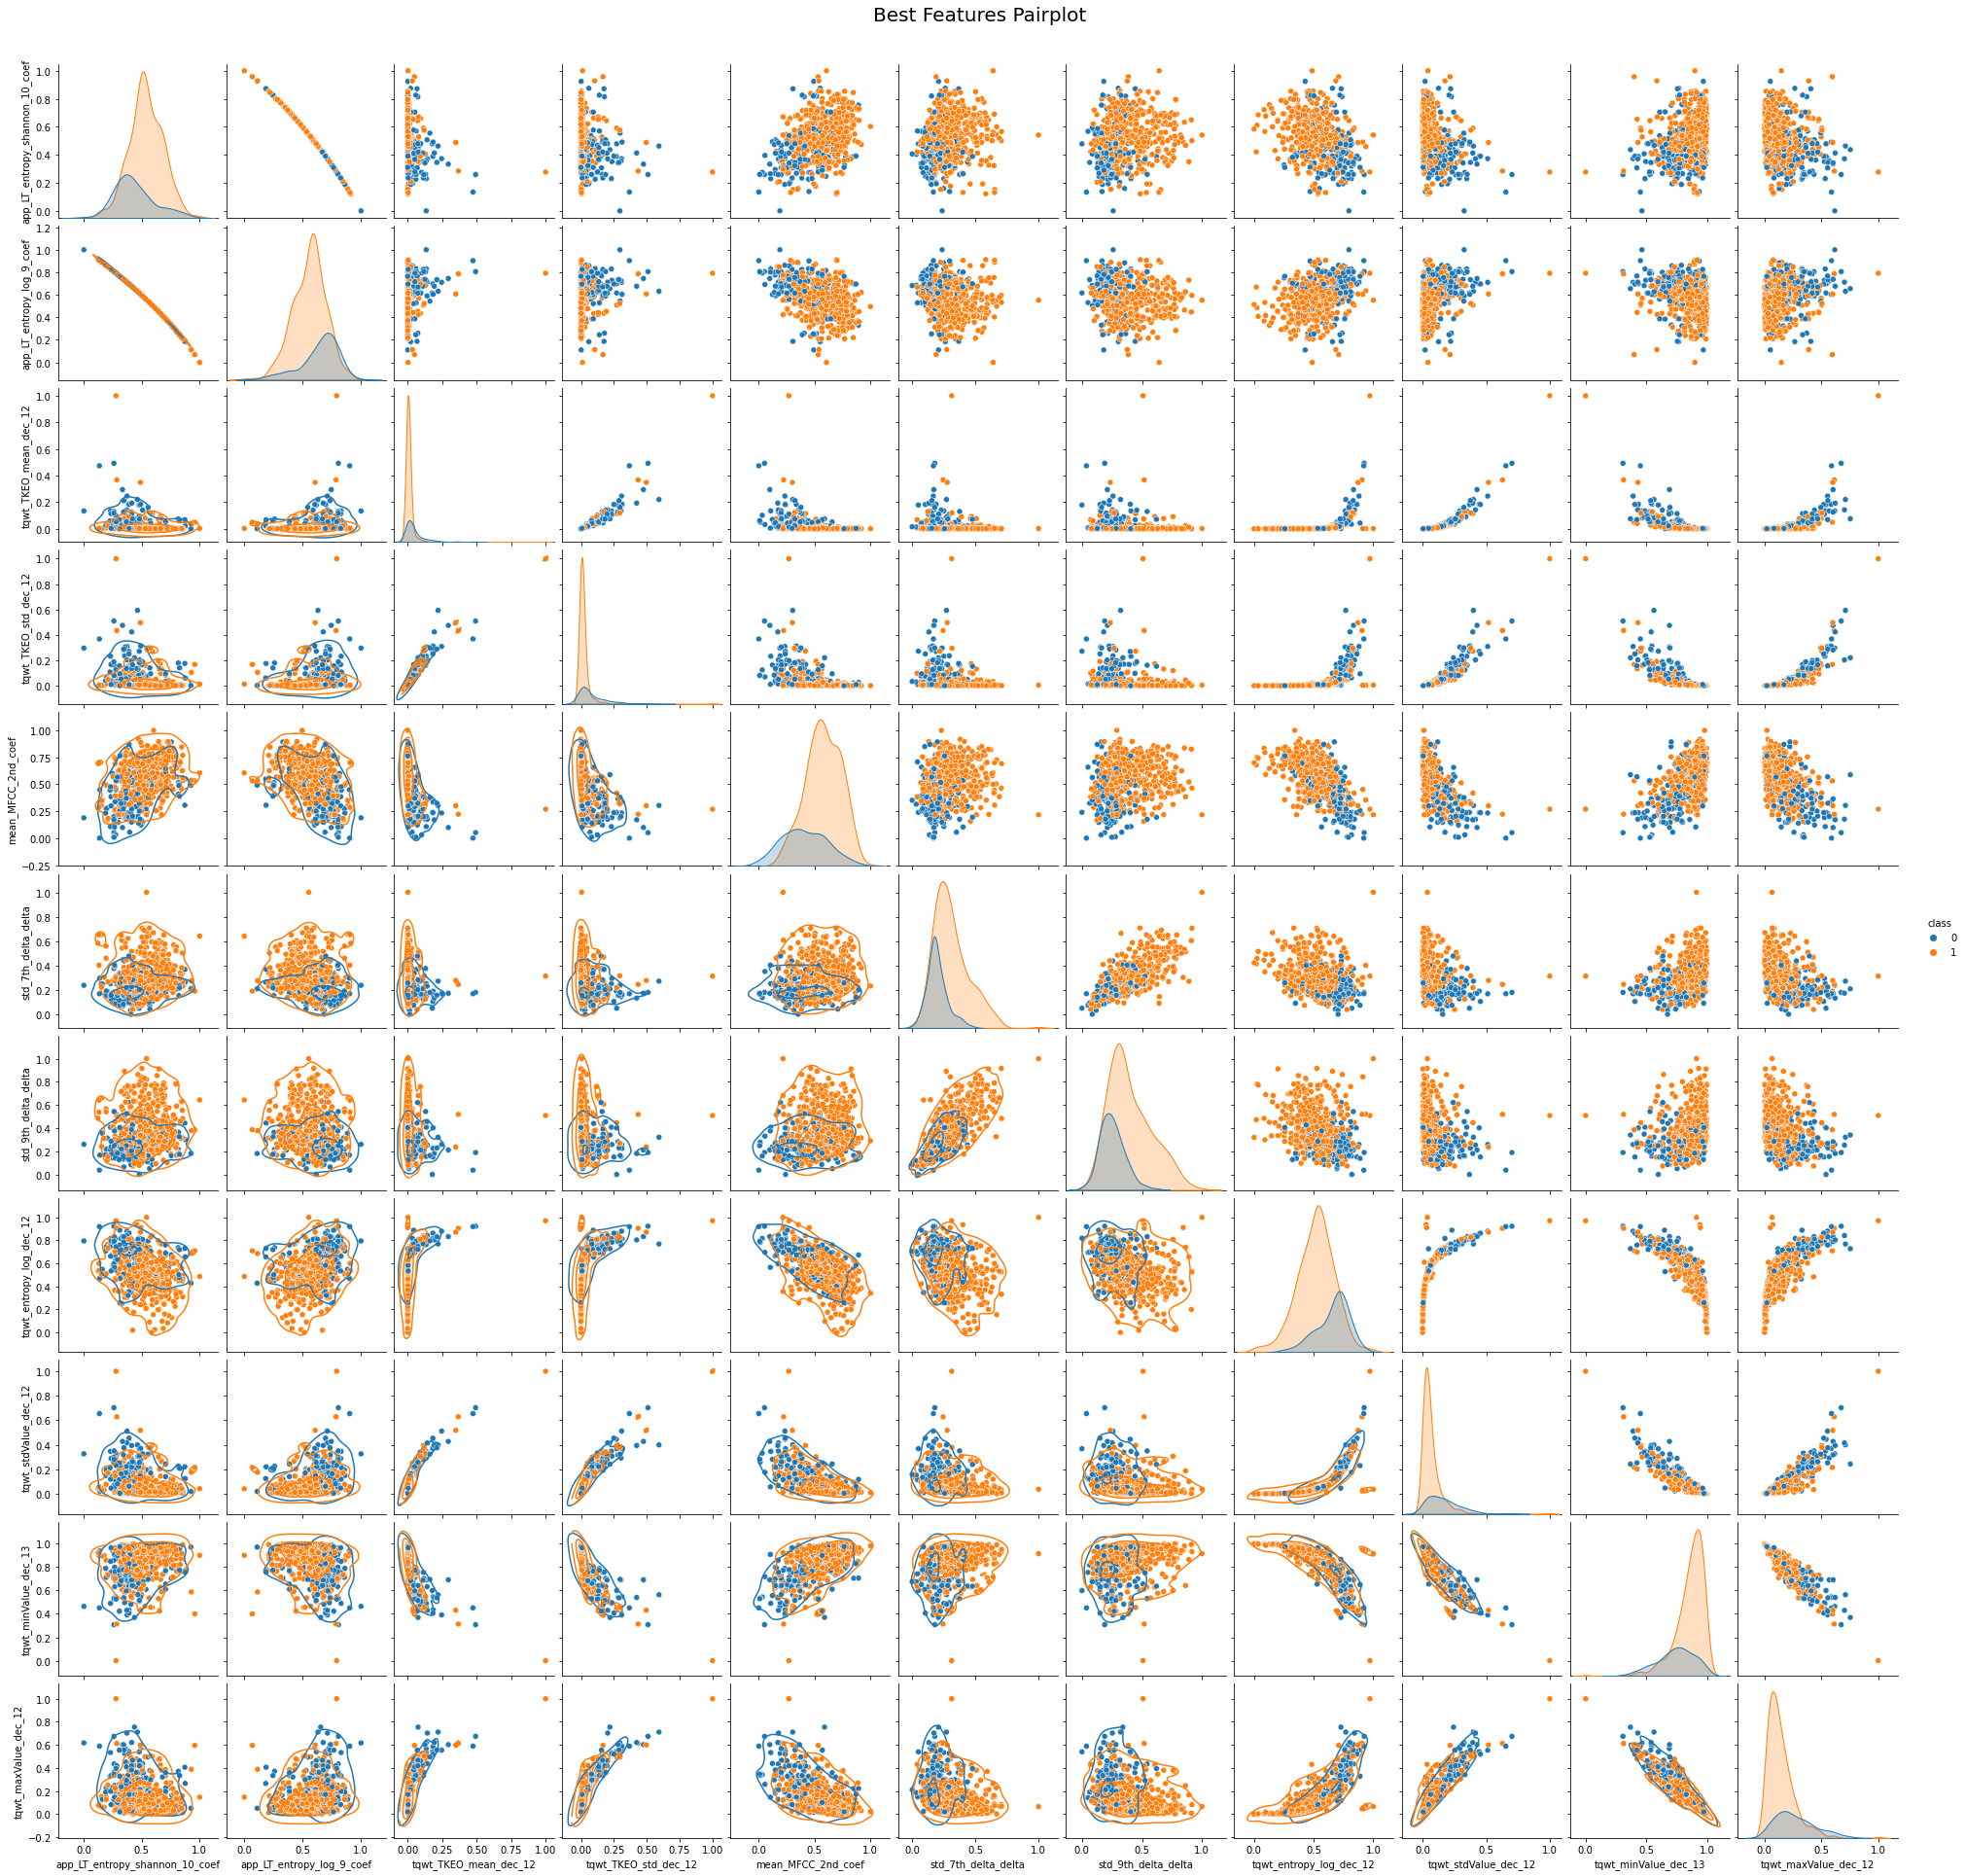

In [18]:
#review as pairplot with Class as the colour. 
pp = sns.pairplot(best_train, hue = 'class')
pp.map_lower(sns.kdeplot, levels=3, color=".4")
plt.subplots_adjust(top = 0.95)
plt.suptitle('Best Features Pairplot', fontsize = 20)
plt.show()

In [19]:
corr_best = best_train.corr()
corr_best['class'].sort_values(ascending = False)

class                             1.000000
mean_MFCC_2nd_coef                0.395818
std_9th_delta_delta               0.365229
tqwt_minValue_dec_13              0.362390
std_7th_delta_delta               0.362017
app_LT_entropy_shannon_10_coef    0.272929
tqwt_TKEO_mean_dec_12            -0.250387
app_LT_entropy_log_9_coef        -0.257046
tqwt_TKEO_std_dec_12             -0.335348
tqwt_entropy_log_dec_12          -0.383339
tqwt_maxValue_dec_12             -0.385779
tqwt_stdValue_dec_12             -0.396482
Name: class, dtype: float64

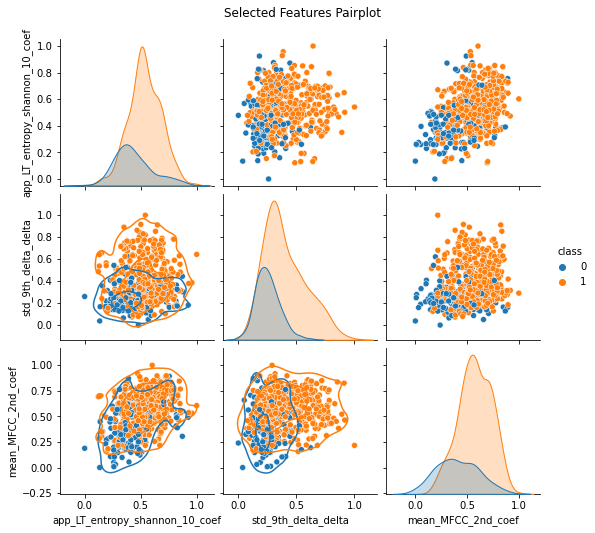

In [20]:
# Three chosen features 

edit_lst = ['app_LT_entropy_shannon_10_coef', 'std_9th_delta_delta',
       'mean_MFCC_2nd_coef','class']

edit = pd.DataFrame(best_train, columns = edit_lst)
# edit.info()
p = sns.pairplot(edit, hue = 'class')
p.map_lower(sns.kdeplot, levels=3, color=".2")
plt.subplots_adjust(top = 0.92)
plt.suptitle('Selected Features Pairplot')
plt.show()

## Applying PCA 

### PCA on 3 Chosen Features

In [21]:
#drop class/target for PCA
X_edit = edit.drop('class', axis = 1)

#PCA
pca_edit = PCA(random_state = 3).fit(X_edit)
pca_edit_out = pca_edit.transform(X_edit)

print('Explained variance:', pca_edit.explained_variance_)
print('Sum of explained variance:',round(sum(pca_edit.explained_variance_),3))
print()
print('Singular values:',pca_edit.singular_values_)


Explained variance: [0.04625576 0.02737095 0.01690414]
Sum of explained variance: 0.091

Singular values: [5.28130886 4.0625953  3.19267842]


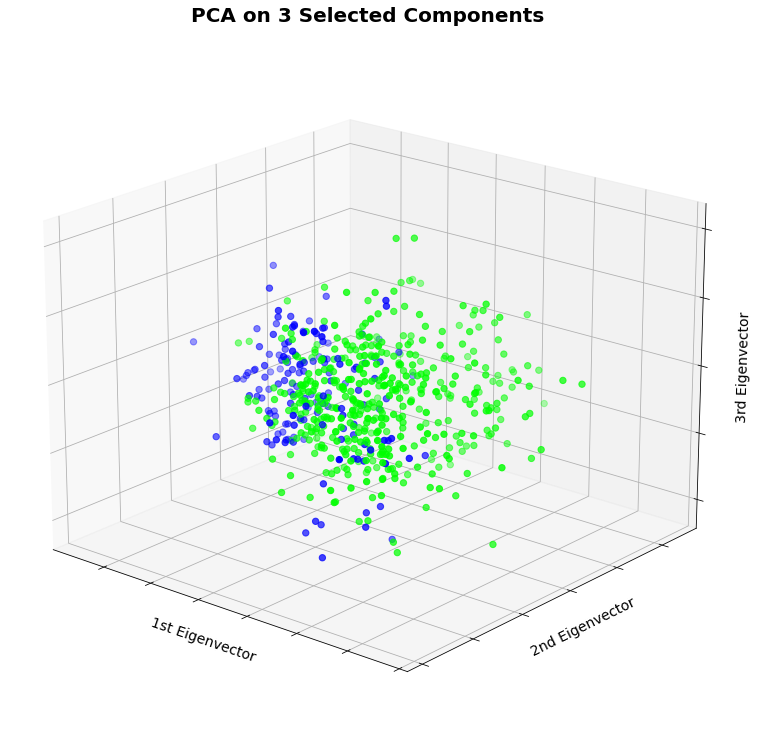

In [22]:
fig = plt.figure(1,figsize = (15,10))
ax = Axes3D(fig, elev = -160, azim = 50)
ax.scatter(pca_edit_out[: , 0],
           pca_edit_out[: , 1],
           pca_edit_out[: , 2],
           c=y_train,
           cmap = plt.cm.brg,
           s=40,)
ax.set_title('PCA on 3 Selected Components', fontweight = 'bold', fontsize = 20)
ax.set_xlabel('1st Eigenvector', fontsize = 14)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('2nd Eigenvector', fontsize = 14)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('3rd Eigenvector', fontsize = 14)
ax.w_zaxis.set_ticklabels([])
plt.show()

### PCA on 3 Components

In [23]:
# PCA on 3 components - to compare with 3 chosen features. 

pca_n3_data = X_df.copy()

n_components = 3
pca_n3 = PCA(n_components = n_components, random_state = 3).fit(pca_n3_data)
pca_n3_out = pca_n3.transform(pca_n3_data)

print('Explained variance:',pca_n3.explained_variance_ratio_)
print()
print('Proportion of variance explained by', n_components, 'principal components: ',round(sum(pca_n3.explained_variance_ratio_),3))
print()
print('Singular values:',pca_n3.singular_values_)


Explained variance: [0.19003863 0.12535249 0.07218678]

Proportion of variance explained by 3 principal components:  0.388

Singular values: [36.25028831 29.44130095 22.34186083]


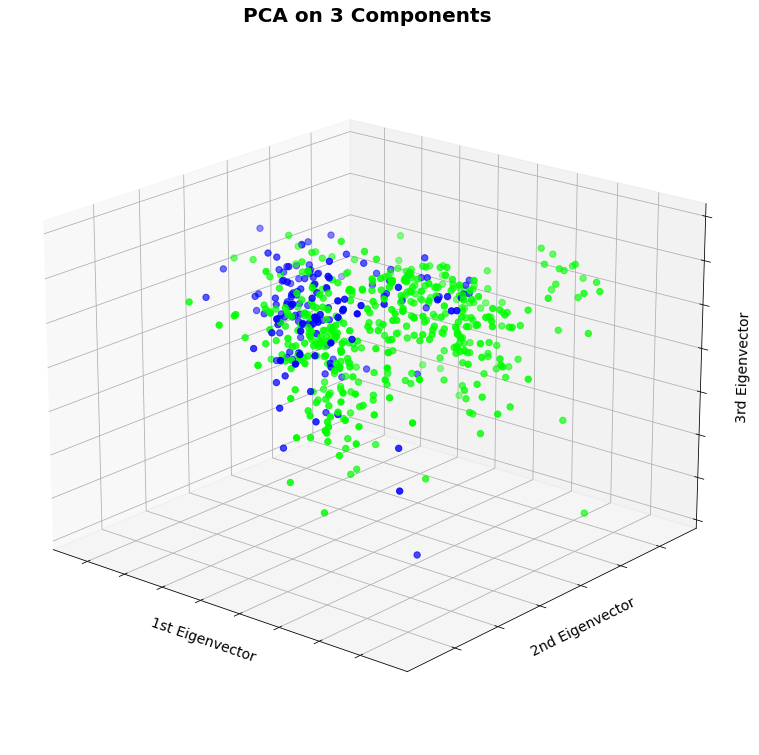

In [24]:
fig2 = plt.figure(1,figsize = (15,10))
ax = Axes3D(fig2, elev = -160, azim = 50)
ax.scatter(pca_n3_out[: , 0],
           pca_n3_out[: , 1],
           pca_n3_out[: , 2],
           c=y_train,
           cmap = plt.cm.brg,
           s=40,)
ax.set_title('PCA on 3 Components', fontweight='bold', fontsize = 20)
ax.set_xlabel('1st Eigenvector', fontsize = 14)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('2nd Eigenvector', fontsize = 14)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('3rd Eigenvector', fontsize = 14)
ax.w_zaxis.set_ticklabels([])

plt.show()

### PCA to Threshold of Variance Explained

In [25]:
#PCA on whole dataset, use scaled_X which is scaled and excludes class/y
#set to output PC's to 90% threshold of the variance_explained

#make a copy of scaled_X to apply PCA to:

pca_t_data = X_df.copy()

threshold = 0.9
pca_t = PCA(n_components = threshold, random_state = 3)
pca_t.fit(pca_t_data)
pca_t_out = pca_t.transform(pca_t_data)

print(pca_t.explained_variance_ratio_)
print()
print("Number of principle components that explain",threshold, "of the variance: ",len(pca_t.explained_variance_))


[0.19003863 0.12535249 0.07218678 0.0578883  0.03886159 0.03532193
 0.02519793 0.02297477 0.02222537 0.01804833 0.01739026 0.01581362
 0.0141677  0.01379461 0.01264986 0.01160746 0.01048158 0.00917774
 0.00875868 0.00833057 0.00764828 0.00702293 0.00684929 0.00623909
 0.00584531 0.0054651  0.00533949 0.00507055 0.00490008 0.00485275
 0.00447964 0.00415722 0.00407534 0.00399701 0.00377735 0.00369679
 0.00361393 0.00348557 0.00331579 0.00327039 0.00310312 0.00303968
 0.00289869 0.00286304 0.00276305 0.00263913 0.00257138 0.00254134
 0.00245309 0.00237167 0.00227813 0.0022655  0.00221849 0.00215975
 0.00206309 0.00203854 0.0020214  0.00198929 0.0019364  0.00190637
 0.00183345 0.00181066 0.00175234 0.00174359 0.00172183 0.00168973
 0.00166101 0.00165537 0.00161643 0.00155722 0.00153502 0.00151569
 0.00147643 0.00146563 0.00141961 0.00141643]

Number of principle components that explain 0.9 of the variance:  76


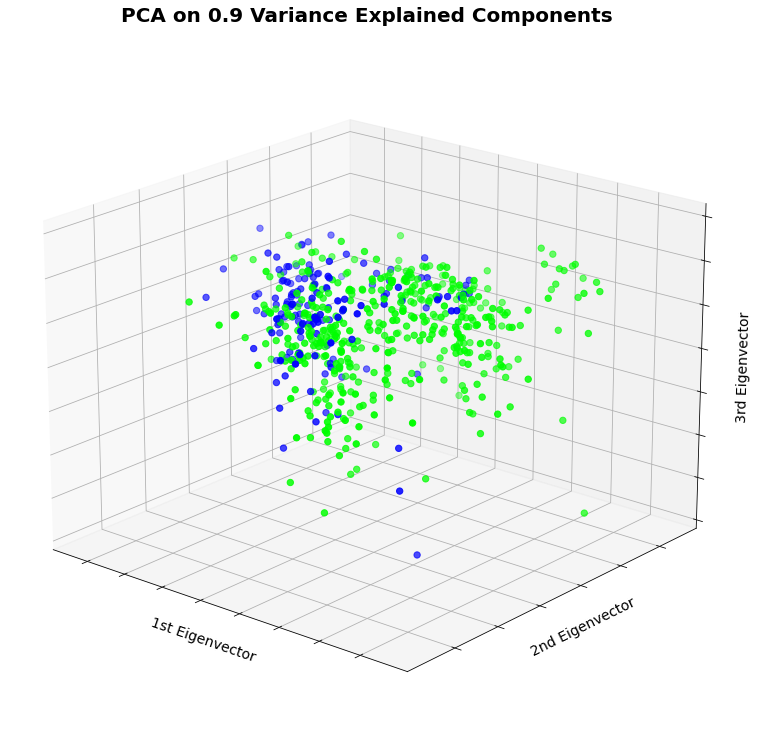

In [26]:
fig3 = plt.figure(1,figsize = (15,10))
ax = Axes3D(fig3, elev = -160, azim = 50)
ax.scatter(pca_t_out[: , 0],
           pca_t_out[: , 1],
           pca_t_out[: , 2],
           c=y_train,
           cmap = plt.cm.brg,
           s=40,)
ax.set_title('PCA on 0.9 Variance Explained Components', fontweight='bold', fontsize = 20)
ax.set_xlabel('1st Eigenvector', fontsize = 14)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('2nd Eigenvector', fontsize = 14)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('3rd Eigenvector',  fontsize = 14)
ax.w_zaxis.set_ticklabels([])
plt.show()

### PCA on First 50 Components

In [27]:
# PCA on 50 components - as an arbitrary but often used number

pca_n_data = X_df.copy()

n_components = 50
pca_n = PCA(n_components = n_components, random_state = 3)
pca_n.fit(pca_n_data)
pca_n_out = pca_n.transform(pca_n_data)

print(pca_n.explained_variance_ratio_)
print()
print('Proportion of variance explained by', n_components, 'principal components: ',round(sum(pca_n.explained_variance_ratio_),3))

[0.19003863 0.12535249 0.07218678 0.0578883  0.03886159 0.03532193
 0.02519793 0.02297477 0.02222537 0.01804833 0.01739026 0.01581362
 0.0141677  0.01379461 0.01264986 0.01160746 0.01048158 0.00917774
 0.00875868 0.00833057 0.00764828 0.00702293 0.00684929 0.00623909
 0.00584531 0.0054651  0.00533949 0.00507055 0.00490007 0.00485275
 0.00447963 0.0041572  0.00407531 0.00399697 0.00377733 0.00369664
 0.00361376 0.00348538 0.0033151  0.00327018 0.00310216 0.00303849
 0.00289535 0.00286124 0.00276034 0.00263421 0.00256807 0.00253447
 0.00241571 0.00235781]

Proportion of variance explained by 50 principal components:  0.855


## Review Performance of PCA Outputs on Models

In [28]:
#Apply all to a couple of models to review performance - KNN for clustering model and SVC for a linear model

def k_fold_scoring(X,y,scoring):
    models = []
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVC', SVC(random_state = 3)))
    results = []
    names = []
    res = []
    for name, model in models:
      kfold = KFold(n_splits=10, random_state=3, shuffle=True)
      cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
      results.append(cv_results)
      names.append(name)
      res.append((name, cv_results.mean()))
    return res

### 1. On All features (scaled) , no PCA

In [29]:
#1. On whole (scaled) training set, no PCA

array = train_df.values
X = array[ : , 0:753]
y = array[: , 753]

total_set = k_fold_scoring(X,y, 'accuracy')
total_set

[('KNN', 0.8806284153005464), ('SVC', 0.8441256830601093)]

### 2. On 3 Selected Features, with PCA

In [30]:
array = X_edit.values
X_3 = array
# y is already set

edit_3_feat = k_fold_scoring(X_3, y, 'accuracy')
edit_3_feat

[('KNN', 0.8059836065573771), ('SVC', 0.8260109289617488)]

### 3. On 3 Components

In [31]:
pca_3_comp = k_fold_scoring(pca_n3_out, y, 'accuracy')
pca_3_comp

[('KNN', 0.7827868852459017), ('SVC', 0.8076502732240437)]

### 4. On Threshold of Variance Explained PCA

In [32]:
pca_threshold = k_fold_scoring(pca_t_out, y,'accuracy')
pca_threshold

[('KNN', 0.8922950819672131), ('SVC', 0.8740710382513661)]

### 5. On 50 Principle Components

In [33]:
pca_n_feat = k_fold_scoring(pca_n_out, y, 'accuracy')
pca_n_feat

[('KNN', 0.8806557377049179), ('SVC', 0.8774043715846995)]


**KNN performs marginally better in 3 of the 5 models**

# Apply KNN to the Test Set

### 1. On all features, no PCA

In [34]:
# apply to test for KNN model across all data sets, best & most consistent performance.
# For all, fit model to training data, predict on testing data

#1. All scales data - NoPCA
all_KNN_model = KNeighborsClassifier()
all_KNN_model.fit(X,y)

all_pred = all_KNN_model.predict(X_test_df)


In [35]:
# 1 on the dataset of all features
all_conf = confusion_matrix(y_test,all_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in all_conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in all_conf.flatten()/np.sum(all_conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(all_conf, annot=labels, fmt='', cmap='Spectral')
ax.set_title('Confusion Matrix - All features, No PCA\n')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

### 2. On 3 Selected Features

In [36]:
#for 3 selected/edited features

edit_KNN_model = KNeighborsClassifier()
edit_KNN_model.fit(X_3,y)

# reduce test set to same 3 dimensions:
X_test_3 = X_test_df[['app_LT_entropy_shannon_10_coef', 
                      'std_9th_delta_delta',
                      'mean_MFCC_2nd_coef']].copy(deep = True)

#Apply PCA to test set of 3 features:
edit_pca = pca_edit.transform(X_test_3)

#Apply model 
edit_pred = edit_KNN_model.predict(edit_pca)


In [37]:
edit_conf = confusion_matrix(y_test, edit_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in edit_conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in edit_conf.flatten()/np.sum(edit_conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(edit_conf, annot=labels, fmt='', cmap='Spectral')
ax.set_title('Confusion Matrix -3 Selected Features\n')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

### 3. On 3 PCA Components

In [38]:
# 3. n_components = 3 PCA - letting PCA choose. 

pca_n3_KNN_model = KNeighborsClassifier()
pca_n3_KNN_model.fit(pca_n3_out, y)

#Copy test set and apply PCA to test set of reduced features:
X_test_n3 = X_test_df.copy()
n3_pca = pca_n3.transform(X_test_n3)

pca_n3_pred = pca_n3_KNN_model.predict(n3_pca)

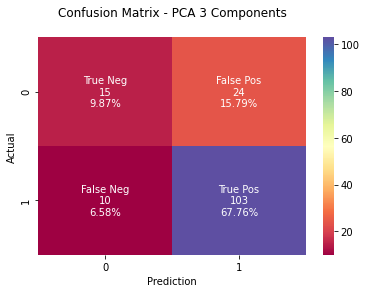

In [39]:
pca_n3_conf = confusion_matrix(y_test, pca_n3_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in pca_n3_conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in pca_n3_conf.flatten()/np.sum(pca_n3_conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(pca_n3_conf, annot=labels, fmt='', cmap='Spectral')
ax.set_title('Confusion Matrix - PCA 3 Components\n')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

### 4. On 0.9 threshold

In [40]:
# 4. 0.9 var expl threshold

pca_t_KNN_model = KNeighborsClassifier()
pca_t_KNN_model.fit(pca_t_out,y)

#Copy test set and apply PCA to test set of reduced features:
X_test_t = X_test_df.copy()
t_pca = pca_t.transform(X_test_t)

pca_t_pred = pca_t_KNN_model.predict(t_pca)

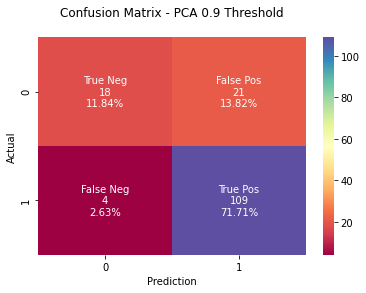

In [41]:
pca_conf = confusion_matrix(y_test, pca_t_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in pca_conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in pca_conf.flatten()/np.sum(pca_conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(pca_conf, annot=labels, fmt='', cmap='Spectral')
ax.set_title('Confusion Matrix - PCA 0.9 Threshold\n')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

### 5. On 50 features

In [42]:
# 5. On 50 features

pca_n_KNN_model = KNeighborsClassifier()
pca_n_KNN_model.fit(pca_n_out, y)

#Copy test set and apply PCA to test set of reduced features:
X_test_n = X_test_df.copy()
n_pca = pca_n.transform(X_test_n)

pca_n_pred = pca_n_KNN_model.predict(n_pca)

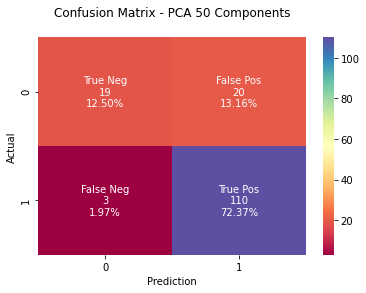

In [43]:
pca_n_conf = confusion_matrix(y_test, pca_n_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in pca_n_conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in pca_n_conf.flatten()/np.sum(pca_n_conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(pca_n_conf, annot=labels, fmt='', cmap='Spectral')
ax.set_title('Confusion Matrix - PCA 50 Components\n')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

## END